## Environment Setup

Importing all required libraries that going to be used in the script. 


In [ ]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set


<function seaborn.rcmod.set(*args, **kwargs)>

## Helper Functions 

All the functions that perform helping tasks with the code

In [ ]:
# This function removes .csv from file names

def remove_csv_filename(file_name):
     return file_name.split('.')[0]
    


In [ ]:
# Since we used google colab to work on the script, this piece of code mounts the 
# google drive associated with out google account. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This function merges csv files in a given directory
def merge_files():
    directory_path = "/content/drive/MyDrive/Colab Notebooks/Python Assignment/DataSet/"
    list_of_years = os.listdir(directory_path)
    merged_data = pd.DataFrame()
    for year in list_of_years:
      # we have two directories as 2014 and 2018, we want to loop for each year
        data_directory = directory_path + year
        for file_name in os.listdir(data_directory):
          # since year and month info is in the name of the file we split the name and get the info
            year = file_name.split("_")[4].lower()
            month = file_name.split("_")[3].lower()
            with open(os.path.join(data_directory, file_name), "r") as csv_file:
                # loading the contents of the csv file
                data = pd.read_csv(csv_file)
                # creating new columns year and month and populating them
                data["year"] = year.replace(".csv","")
                data["month"] = month
                # pushing all the contents in the merged data frame
                merged_data = pd.concat([merged_data, data], ignore_index=True)
                
    return merged_data

In [ ]:
# this function removes given columns from the data. 
def remove_columns(column_name_with_string, data):
    delete_columns = [col for col in data.columns if column_name_with_string in col]
    # get a list of columns to delete
    data.drop(columns=delete_columns, inplace=True)
    
    return data

In [ ]:
# This function renames the columns to make it more programming friendly
# e.g Name of County
def rename_columns(data):
  data.columns = map(str.lower, data.columns)
  data.rename(columns={'unnamed: 0':'county','number of homicide convictions':'successful_homicide',
       'number of homicide unsuccessful':'unsuccessful_homicide',
       'number of offences against the person convictions':'successful_against_person',
       'number of offences against the person unsuccessful':'unsuccessful_against_person',
       'number of sexual offences convictions':'successful_sexual_offences',
       'number of sexual offences unsuccessful':'unsuccessful_sexual_offences',
       'number of burglary convictions':'successful_burglary', 'number of burglary unsuccessful':'unsuccessful_burglary',
       'number of robbery convictions':'successful_robbery', 'number of robbery unsuccessful':'unsuccessful_robbery',
       'number of theft and handling convictions':'successful_theft',
       'number of theft and handling unsuccessful':'unsuccessful_theft',
       'number of fraud and forgery convictions':'successful_fraud',
       'number of fraud and forgery unsuccessful':'unsuccessful_fraud',
       'number of criminal damage convictions':'successful_criminal_damage',
       'number of criminal damage unsuccessful':'unsuccessful_criminal_damage',
       'number of drugs offences convictions':'successful_drugs',
       'number of drugs offences unsuccessful':'unsuccessful_drugs',
       'number of public order offences convictions':'successful_public_order',
       'number of public order offences unsuccessful':'unsuccessful_public_order',
       'number of all other offences (excluding motoring) convictions':'successful_other',
       'number of all other offences (excluding motoring) unsuccessful':'unsuccessful_other',
       'number of motoring offences convictions':'successful_motoring',
       'number of motoring offences unsuccessful':'unsuccessful_motoring',
       'number of admin finalised unsuccessful':'unsuccessful_admin'}, inplace=True)
  return data


In [ ]:
merged_data = merge_files()

In [ ]:
print(merged_data) 

            Unnamed: 0  Number of Homicide Convictions  \
0             National                              94   
1    Avon and Somerset                               2   
2         Bedfordshire                               0   
3       Cambridgeshire                               3   
4             Cheshire                               0   
..                 ...                             ...   
855       Warwickshire                               0   
856        West Mercia                               0   
857      West Midlands                               1   
858     West Yorkshire                               3   
859          Wiltshire                               1   

    Percentage of Homicide Convictions  Number of Homicide Unsuccessful  \
0                                84.7%                               17   
1                               100.0%                                0   
2                                    -                                0   
3  

In [ ]:
merged_data.to_csv("merged_file.csv", index=False)

## Exploring Merged Data

In [ ]:
merged_data.head()

,Unnamed: 0,Number of Homicide Convictions,Percentage of Homicide Convictions,Number of Homicide Unsuccessful,Percentage of Homicide Unsuccessful,Number of Offences Against The Person Convictions,Percentage of Offences Against The Person Convictions,Number of Offences Against The Person Unsuccessful,Percentage of Offences Against The Person Unsuccessful,Number of Sexual Offences Convictions,...,Number of All Other Offences (excluding Motoring) Unsuccessful,Percentage of All Other Offences (excluding Motoring) Unsuccessful,Number of Motoring Offences Convictions,Percentage of Motoring Offences Convictions,Number of Motoring Offences Unsuccessful,Percentage of Motoring Offences Unsuccessful,Number of Admin Finalised Unsuccessful,Percentage of L Motoring Offences Unsuccessful,year,month
0,National,94,84.7%,17,15.3%,"9,119",78.9%,"2,437",21.1%,883,...,94,11.7%,"6,917",85.3%,"1,196",14.7%,869,100.0%,2018,february
1,Avon and Somerset,2,100.0%,0,0.0%,229,79.2%,60,20.8%,33,...,0,0.0%,183,87.6%,26,12.4%,34,100.0%,2018,february
2,Bedfordshire,0,-,0,-,51,65.4%,27,34.6%,5,...,0,0.0%,99,76.7%,30,23.3%,18,100.0%,2018,february
3,Cambridgeshire,3,100.0%,0,0.0%,109,77.3%,32,22.7%,8,...,0,0.0%,92,91.1%,9,8.9%,13,100.0%,2018,february
4,Cheshire,0,-,0,-,230,81.6%,52,18.4%,18,...,1,6.3%,197,84.5%,36,15.5%,22,100.0%,2018,february


In [ ]:
merged_data.shape

(860, 53)

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 53 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Unnamed: 0                                                          860 non-null    object
 1   Number of Homicide Convictions                                      860 non-null    int64 
 2   Percentage of Homicide Convictions                                  860 non-null    object
 3   Number of Homicide Unsuccessful                                     860 non-null    int64 
 4   Percentage of Homicide Unsuccessful                                 860 non-null    object
 5   Number of Offences Against The Person Convictions                   860 non-null    object
 6   Percentage of Offences Against The Person Convictions               860 non-null    object
 7   Number of Offences Against

In [ ]:
merged_data.describe(include = 'all')

,Unnamed: 0,Number of Homicide Convictions,Percentage of Homicide Convictions,Number of Homicide Unsuccessful,Percentage of Homicide Unsuccessful,Number of Offences Against The Person Convictions,Percentage of Offences Against The Person Convictions,Number of Offences Against The Person Unsuccessful,Percentage of Offences Against The Person Unsuccessful,Number of Sexual Offences Convictions,...,Number of All Other Offences (excluding Motoring) Unsuccessful,Percentage of All Other Offences (excluding Motoring) Unsuccessful,Number of Motoring Offences Convictions,Percentage of Motoring Offences Convictions,Number of Motoring Offences Unsuccessful,Percentage of Motoring Offences Unsuccessful,Number of Admin Finalised Unsuccessful,Percentage of L Motoring Offences Unsuccessful,year,month
count,860,860.000000,860,860.000000,860,860,860,860,860,860.0,...,860.000000,860,860,860,860,860,860.000000,860,860,860
unique,43,NaN,60,NaN,60,365,240,197,239,155.0,...,NaN,224,329,203,138,201,NaN,2,2,12
top,National,NaN,100.0%,NaN,0.0%,83,82.1%,33,17.9%,7.0,...,NaN,0.0%,80,89.0%,10,11.0%,NaN,100.0%,2014,february
freq,20,NaN,345,NaN,345,10,13,20,13,42.0,...,NaN,108,11,13,40,13,NaN,850,516,86
mean,NaN,3.404651,NaN,0.818605,NaN,NaN,NaN,NaN,NaN,NaN,...,16.660465,NaN,NaN,NaN,NaN,NaN,38.230233,NaN,NaN,NaN
std,NaN,11.657370,NaN,2.995088,NaN,NaN,NaN,NaN,NaN,NaN,...,63.583599,NaN,NaN,NaN,NaN,NaN,126.146525,NaN,NaN,NaN
min,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1.750000,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
50%,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN
75%,NaN,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,10.000000,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN


## Data Cleaning

After looking at the data we realized it needs cleaning before we proceed. Percentage columns are needed to be removed as they can be calculated any time with the help of existing columns. Then data needed to converted into correct format before proceeding

In [ ]:
data = remove_columns('Percentage', merged_data)

In [ ]:
data = rename_columns(data)

In [ ]:
# The National rows are just totals of the columns per month and therefore we will drop them 
data = data.drop(data[data['county'] == 'National'].index)

In [ ]:
# Checking data types for all columns. 
# Mixed data types object and int the best is to convert all to interger 
print (data.dtypes)

county                          object
successful_homicide              int64
unsuccessful_homicide            int64
successful_against_person       object
unsuccessful_against_person     object
successful_sexual_offences      object
unsuccessful_sexual_offences     int64
successful_burglary             object
unsuccessful_burglary            int64
successful_robbery               int64
unsuccessful_robbery             int64
successful_theft                object
unsuccessful_theft              object
successful_fraud                 int64
unsuccessful_fraud               int64
successful_criminal_damage      object
unsuccessful_criminal_damage     int64
successful_drugs                object
unsuccessful_drugs               int64
successful_public_order         object
unsuccessful_public_order        int64
successful_other                object
unsuccessful_other               int64
successful_motoring             object
unsuccessful_motoring           object
unsuccessful_admin       

**To change all data types with object to integer type**

In [ ]:
print(data.columns)

Index(['county', 'successful_homicide', 'unsuccessful_homicide',
       'successful_against_person', 'unsuccessful_against_person',
       'successful_sexual_offences', 'unsuccessful_sexual_offences',
       'successful_burglary', 'unsuccessful_burglary', 'successful_robbery',
       'unsuccessful_robbery', 'successful_theft', 'unsuccessful_theft',
       'successful_fraud', 'unsuccessful_fraud', 'successful_criminal_damage',
       'unsuccessful_criminal_damage', 'successful_drugs',
       'unsuccessful_drugs', 'successful_public_order',
       'unsuccessful_public_order', 'successful_other', 'unsuccessful_other',
       'successful_motoring', 'unsuccessful_motoring', 'unsuccessful_admin',
       'year', 'month'],
      dtype='object')


In [ ]:
# convert object columns to numeric type with NaN values for non-numeric values
data[['successful_homicide', 'unsuccessful_homicide', 'successful_against_person',
       'unsuccessful_against_person', 'successful_sexual_offences',
       'unsuccessful_sexual_offences', 'successful_burglary', 'unsuccessful_burglary',
       'successful_robbery', 'unsuccessful_robbery', 'successful_theft',
       'unsuccessful_theft', 'successful_fraud',
       'unsuccessful_fraud', 'successful_criminal_damage',
       'unsuccessful_criminal_damage', 'successful_drugs', 'unsuccessful_drugs',
       'successful_public_order', 'unsuccessful_public_order', 'successful_other',
       'unsuccessful_other', 'successful_motoring', 'unsuccessful_motoring',
       'unsuccessful_admin',]] = data[['successful_homicide', 'unsuccessful_homicide', 'successful_against_person',
       'unsuccessful_against_person', 'successful_sexual_offences',
       'unsuccessful_sexual_offences', 'successful_burglary', 'unsuccessful_burglary',
       'successful_robbery', 'unsuccessful_robbery', 'successful_theft',
       'unsuccessful_theft', 'successful_fraud',
       'unsuccessful_fraud', 'successful_criminal_damage',
       'unsuccessful_criminal_damage', 'successful_drugs', 'unsuccessful_drugs',
       'successful_public_order', 'unsuccessful_public_order', 'successful_other',
       'unsuccessful_other', 'successful_motoring', 'unsuccessful_motoring',
       'unsuccessful_admin']].apply(pd.to_numeric, errors='coerce')

In [ ]:
# replace NaN values with a default value (e.g., 0)
data[['successful_homicide', 'unsuccessful_homicide', 'successful_against_person',
       'unsuccessful_against_person', 'successful_sexual_offences',
       'unsuccessful_sexual_offences', 'successful_burglary', 'unsuccessful_burglary',
       'successful_robbery', 'unsuccessful_robbery', 'successful_theft',
       'unsuccessful_theft', 'successful_fraud',
       'unsuccessful_fraud', 'successful_criminal_damage',
       'unsuccessful_criminal_damage', 'successful_drugs', 'unsuccessful_drugs',
       'successful_public_order', 'unsuccessful_public_order', 'successful_other',
       'unsuccessful_other', 'successful_motoring', 'unsuccessful_motoring',
       'unsuccessful_admin']] = data[['successful_homicide', 'unsuccessful_homicide', 'successful_against_person',
       'unsuccessful_against_person', 'successful_sexual_offences',
       'unsuccessful_sexual_offences', 'successful_burglary', 'unsuccessful_burglary',
       'successful_robbery', 'unsuccessful_robbery', 'successful_theft',
       'unsuccessful_theft', 'successful_fraud',
       'unsuccessful_fraud', 'successful_criminal_damage',
       'unsuccessful_criminal_damage', 'successful_drugs', 'unsuccessful_drugs',
       'successful_public_order', 'unsuccessful_public_order', 'successful_other',
       'unsuccessful_other', 'successful_motoring', 'unsuccessful_motoring',
       'unsuccessful_admin']].fillna(0).astype('int64')

In [ ]:
# Check changes
print (data.dtypes)

county                          object
successful_homicide              int64
unsuccessful_homicide            int64
successful_against_person        int64
unsuccessful_against_person      int64
successful_sexual_offences       int64
unsuccessful_sexual_offences     int64
successful_burglary              int64
unsuccessful_burglary            int64
successful_robbery               int64
unsuccessful_robbery             int64
successful_theft                 int64
unsuccessful_theft               int64
successful_fraud                 int64
unsuccessful_fraud               int64
successful_criminal_damage       int64
unsuccessful_criminal_damage     int64
successful_drugs                 int64
unsuccessful_drugs               int64
successful_public_order          int64
unsuccessful_public_order        int64
successful_other                 int64
unsuccessful_other               int64
successful_motoring              int64
unsuccessful_motoring            int64
unsuccessful_admin       

In [ ]:
# Checking for sum of missing values per column 
print(data.isnull().sum())

county                          0
successful_homicide             0
unsuccessful_homicide           0
successful_against_person       0
unsuccessful_against_person     0
successful_sexual_offences      0
unsuccessful_sexual_offences    0
successful_burglary             0
unsuccessful_burglary           0
successful_robbery              0
unsuccessful_robbery            0
successful_theft                0
unsuccessful_theft              0
successful_fraud                0
unsuccessful_fraud              0
successful_criminal_damage      0
unsuccessful_criminal_damage    0
successful_drugs                0
unsuccessful_drugs              0
successful_public_order         0
unsuccessful_public_order       0
successful_other                0
unsuccessful_other              0
successful_motoring             0
unsuccessful_motoring           0
unsuccessful_admin              0
year                            0
month                           0
dtype: int64


In [ ]:
# Obtaining a list of unique values in month column
data.month.unique()

array(['february', 'august', 'december', 'march', 'january', 'september',
       'july', 'october', 'april', 'may', 'june', 'november'],
      dtype=object)

In [ ]:
# Obtaining a list of unique values in year column
data.year.unique()

array(['2018', '2014'], dtype=object)

In [ ]:
# reorder columns to place year and month column to index 0 and 1 respectively
cols = list(data.columns)
cols.insert(0, cols.pop(cols.index('year')))
cols.insert(1, cols.pop(cols.index('month')))
data = data.loc[:, cols]



In [ ]:
# print dataframe
print(data.head())

   year     month             county  successful_homicide  \
1  2018  february  Avon and Somerset                    2   
2  2018  february       Bedfordshire                    0   
3  2018  february     Cambridgeshire                    3   
4  2018  february           Cheshire                    0   
5  2018  february          Cleveland                    0   

   unsuccessful_homicide  successful_against_person  \
1                      0                        229   
2                      0                         51   
3                      0                        109   
4                      0                        230   
5                      0                        103   

   unsuccessful_against_person  successful_sexual_offences  \
1                           60                          33   
2                           27                           5   
3                           32                           8   
4                           52                        

# Exploring Data 

After cleaning we again need to look at the data and make sure everything is in correct order

In [ ]:
data.describe(include ='all')

,year,month,county,successful_homicide,unsuccessful_homicide,successful_against_person,unsuccessful_against_person,successful_sexual_offences,unsuccessful_sexual_offences,successful_burglary,...,unsuccessful_criminal_damage,successful_drugs,unsuccessful_drugs,successful_public_order,unsuccessful_public_order,successful_other,unsuccessful_other,successful_motoring,unsuccessful_motoring,unsuccessful_admin
count,840,840,840,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
unique,2,12,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2014,february,Avon and Somerset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,504,84,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.742857,0.419048,184.514286,66.589286,20.257143,7.632143,32.332143,...,8.575000,82.973810,6.584524,86.720238,14.897619,45.589286,8.528571,174.150000,30.905952,19.570238
std,NaN,NaN,NaN,2.998700,1.197183,116.608510,87.682799,22.074056,11.362555,33.965283,...,9.470315,99.789119,11.695888,91.795734,21.248100,69.504266,14.784479,139.268988,52.200694,32.475458
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.000000,100.750000,26.000000,7.000000,2.000000,14.000000,...,3.000000,37.000000,2.000000,41.000000,5.000000,11.000000,1.000000,94.000000,11.000000,7.000000
50%,NaN,NaN,NaN,1.000000,0.000000,158.000000,43.000000,13.000000,4.000000,23.000000,...,6.000000,61.500000,4.000000,65.000000,10.000000,22.000000,4.000000,141.500000,19.000000,12.000000
75%,NaN,NaN,NaN,2.000000,0.000000,242.000000,73.000000,26.000000,10.000000,38.000000,...,10.000000,97.000000,7.000000,102.000000,16.250000,53.000000,10.000000,211.500000,32.000000,20.000000


In [ ]:
data.describe()

,successful_homicide,unsuccessful_homicide,successful_against_person,unsuccessful_against_person,successful_sexual_offences,unsuccessful_sexual_offences,successful_burglary,unsuccessful_burglary,successful_robbery,unsuccessful_robbery,...,unsuccessful_criminal_damage,successful_drugs,unsuccessful_drugs,successful_public_order,unsuccessful_public_order,successful_other,unsuccessful_other,successful_motoring,unsuccessful_motoring,unsuccessful_admin
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,1.742857,0.419048,184.514286,66.589286,20.257143,7.632143,32.332143,5.389286,10.978571,2.934524,...,8.575000,82.973810,6.584524,86.720238,14.897619,45.589286,8.528571,174.150000,30.905952,19.570238
std,2.998700,1.197183,116.608510,87.682799,22.074056,11.362555,33.965283,8.460643,21.715289,6.915064,...,9.470315,99.789119,11.695888,91.795734,21.248100,69.504266,14.784479,139.268988,52.200694,32.475458
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,100.750000,26.000000,7.000000,2.000000,14.000000,1.000000,3.000000,0.000000,...,3.000000,37.000000,2.000000,41.000000,5.000000,11.000000,1.000000,94.000000,11.000000,7.000000
50%,1.000000,0.000000,158.000000,43.000000,13.000000,4.000000,23.000000,3.000000,6.000000,1.000000,...,6.000000,61.500000,4.000000,65.000000,10.000000,22.000000,4.000000,141.500000,19.000000,12.000000
75%,2.000000,0.000000,242.000000,73.000000,26.000000,10.000000,38.000000,6.000000,10.000000,3.000000,...,10.000000,97.000000,7.000000,102.000000,16.250000,53.000000,10.000000,211.500000,32.000000,20.000000
max,29.000000,11.000000,688.000000,642.000000,145.000000,91.000000,266.000000,79.000000,209.000000,61.000000,...,81.000000,978.000000,98.000000,779.000000,170.000000,551.000000,129.000000,1231.000000,431.000000,261.000000


In [ ]:
# Exclude the "year" column from consideration
columns_to_exclude = ["year"]
filtered_columns = [col for col in data.columns if col not in columns_to_exclude]

In [ ]:
# Calculate the mean of each column excluding the "year" column
column_means = data[filtered_columns].mean()

<ipython-input-33-77865ddde56c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = data[filtered_columns].mean()


In [ ]:
# Find the column with the highest mean
column_with_highest_mean = column_means.idxmax()

print("Column with the highest mean (excluding 'year'): ", column_with_highest_mean)

Column with the highest mean (excluding 'year'):  successful_against_person


# Observations

There is a very high percentage ratio of unsuccessful convictions to successful convictions for crimes against person of about 93.31%
The unique value of counties shows that data has been taken in 42 counties.
The successful convictions for crimes against person have the highest average of 184.51 and high standard deviation of 116.61 meaning  the values in the column are more spread out or dispersed from the mean. 

array([[<Axes: title={'center': 'successful_homicide'}>,
        <Axes: title={'center': 'unsuccessful_homicide'}>,
        <Axes: title={'center': 'successful_against_person'}>,
        <Axes: title={'center': 'unsuccessful_against_person'}>,
        <Axes: title={'center': 'successful_sexual_offences'}>],
       [<Axes: title={'center': 'unsuccessful_sexual_offences'}>,
        <Axes: title={'center': 'successful_burglary'}>,
        <Axes: title={'center': 'unsuccessful_burglary'}>,
        <Axes: title={'center': 'successful_robbery'}>,
        <Axes: title={'center': 'unsuccessful_robbery'}>],
       [<Axes: title={'center': 'successful_theft'}>,
        <Axes: title={'center': 'unsuccessful_theft'}>,
        <Axes: title={'center': 'successful_fraud'}>,
        <Axes: title={'center': 'unsuccessful_fraud'}>,
        <Axes: title={'center': 'successful_criminal_damage'}>],
       [<Axes: title={'center': 'unsuccessful_criminal_damage'}>,
        <Axes: title={'center': 'successful

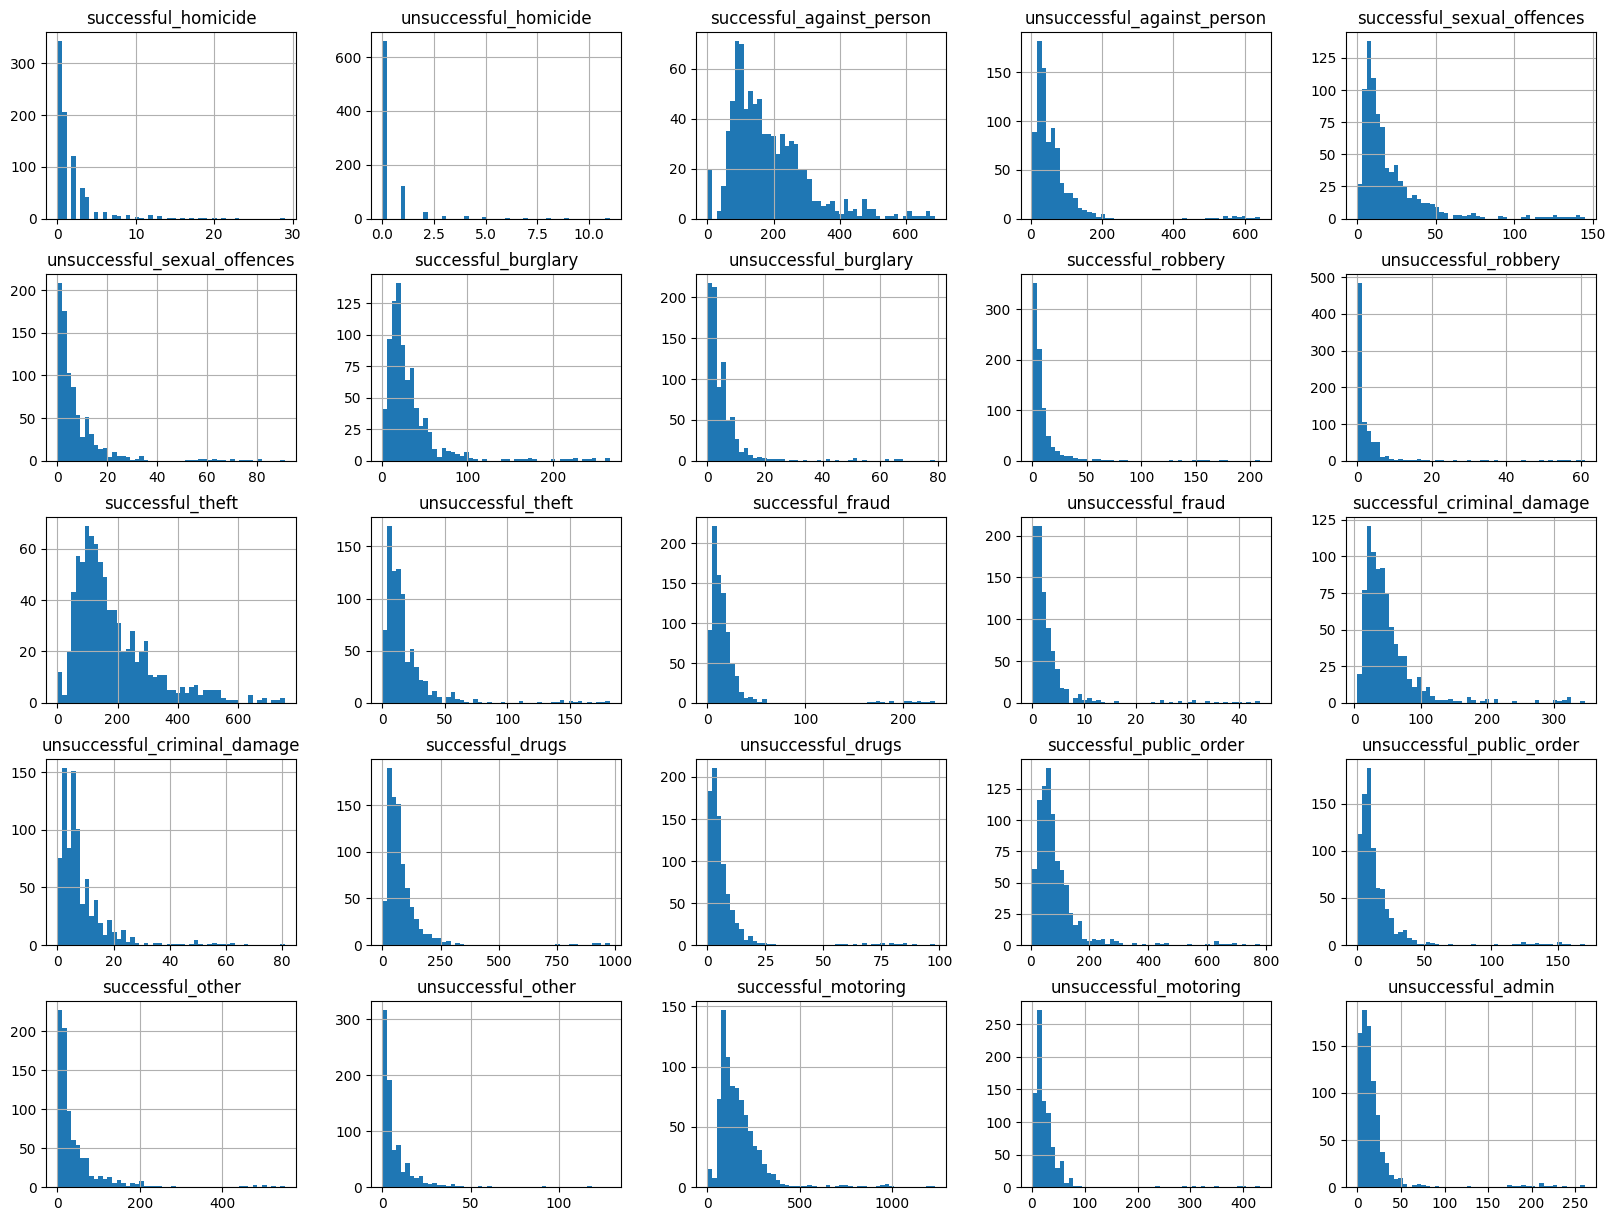

In [ ]:
data.hist(bins =50, figsize = (20,15))

Attributes are scaled differently therefore we might need to consider normalisation
Some of the variables have a right skewed distribution which means we might need to take into consideration some outliers eg sexual_offences, criminal_damage, against person and theft

In [ ]:
# Create a new DataFrame with the totals of successful crimes per crime type
crime_totals = data.groupby([
    'successful_homicide', 'successful_against_person', 'successful_sexual_offences', 'successful_burglary', 'successful_robbery',
    'successful_theft', 'successful_fraud', 'successful_criminal_damage', 'successful_drugs',
    'successful_public_order', 'successful_other', 'successful_motoring'
])[['unsuccessful_homicide', 'unsuccessful_against_person', 'unsuccessful_sexual_offences',
    'unsuccessful_burglary', 'unsuccessful_robbery', 'unsuccessful_theft',
    'unsuccessful_fraud', 'unsuccessful_criminal_damage', 'unsuccessful_drugs',
    'unsuccessful_public_order', 'unsuccessful_other']].sum().reset_index()

# Create a correlation matrix
corr_matrix = crime_totals.corr()

print(corr_matrix)

                              successful_homicide  successful_against_person  \
successful_homicide                      1.000000                   0.144947   
successful_against_person                0.144947                   1.000000   
successful_sexual_offences               0.712174                   0.350218   
successful_burglary                      0.678108                   0.247621   
successful_robbery                       0.702485                   0.104757   
successful_theft                         0.238092                   0.634617   
successful_fraud                         0.731843                   0.013358   
successful_criminal_damage               0.639470                   0.331396   
successful_drugs                         0.469637                   0.271341   
successful_public_order                  0.661367                   0.229966   
successful_other                         0.548403                   0.089612   
successful_motoring                     

In [ ]:
min_corr= min(crime_totals.corr())
print(min_corr)

successful_against_person


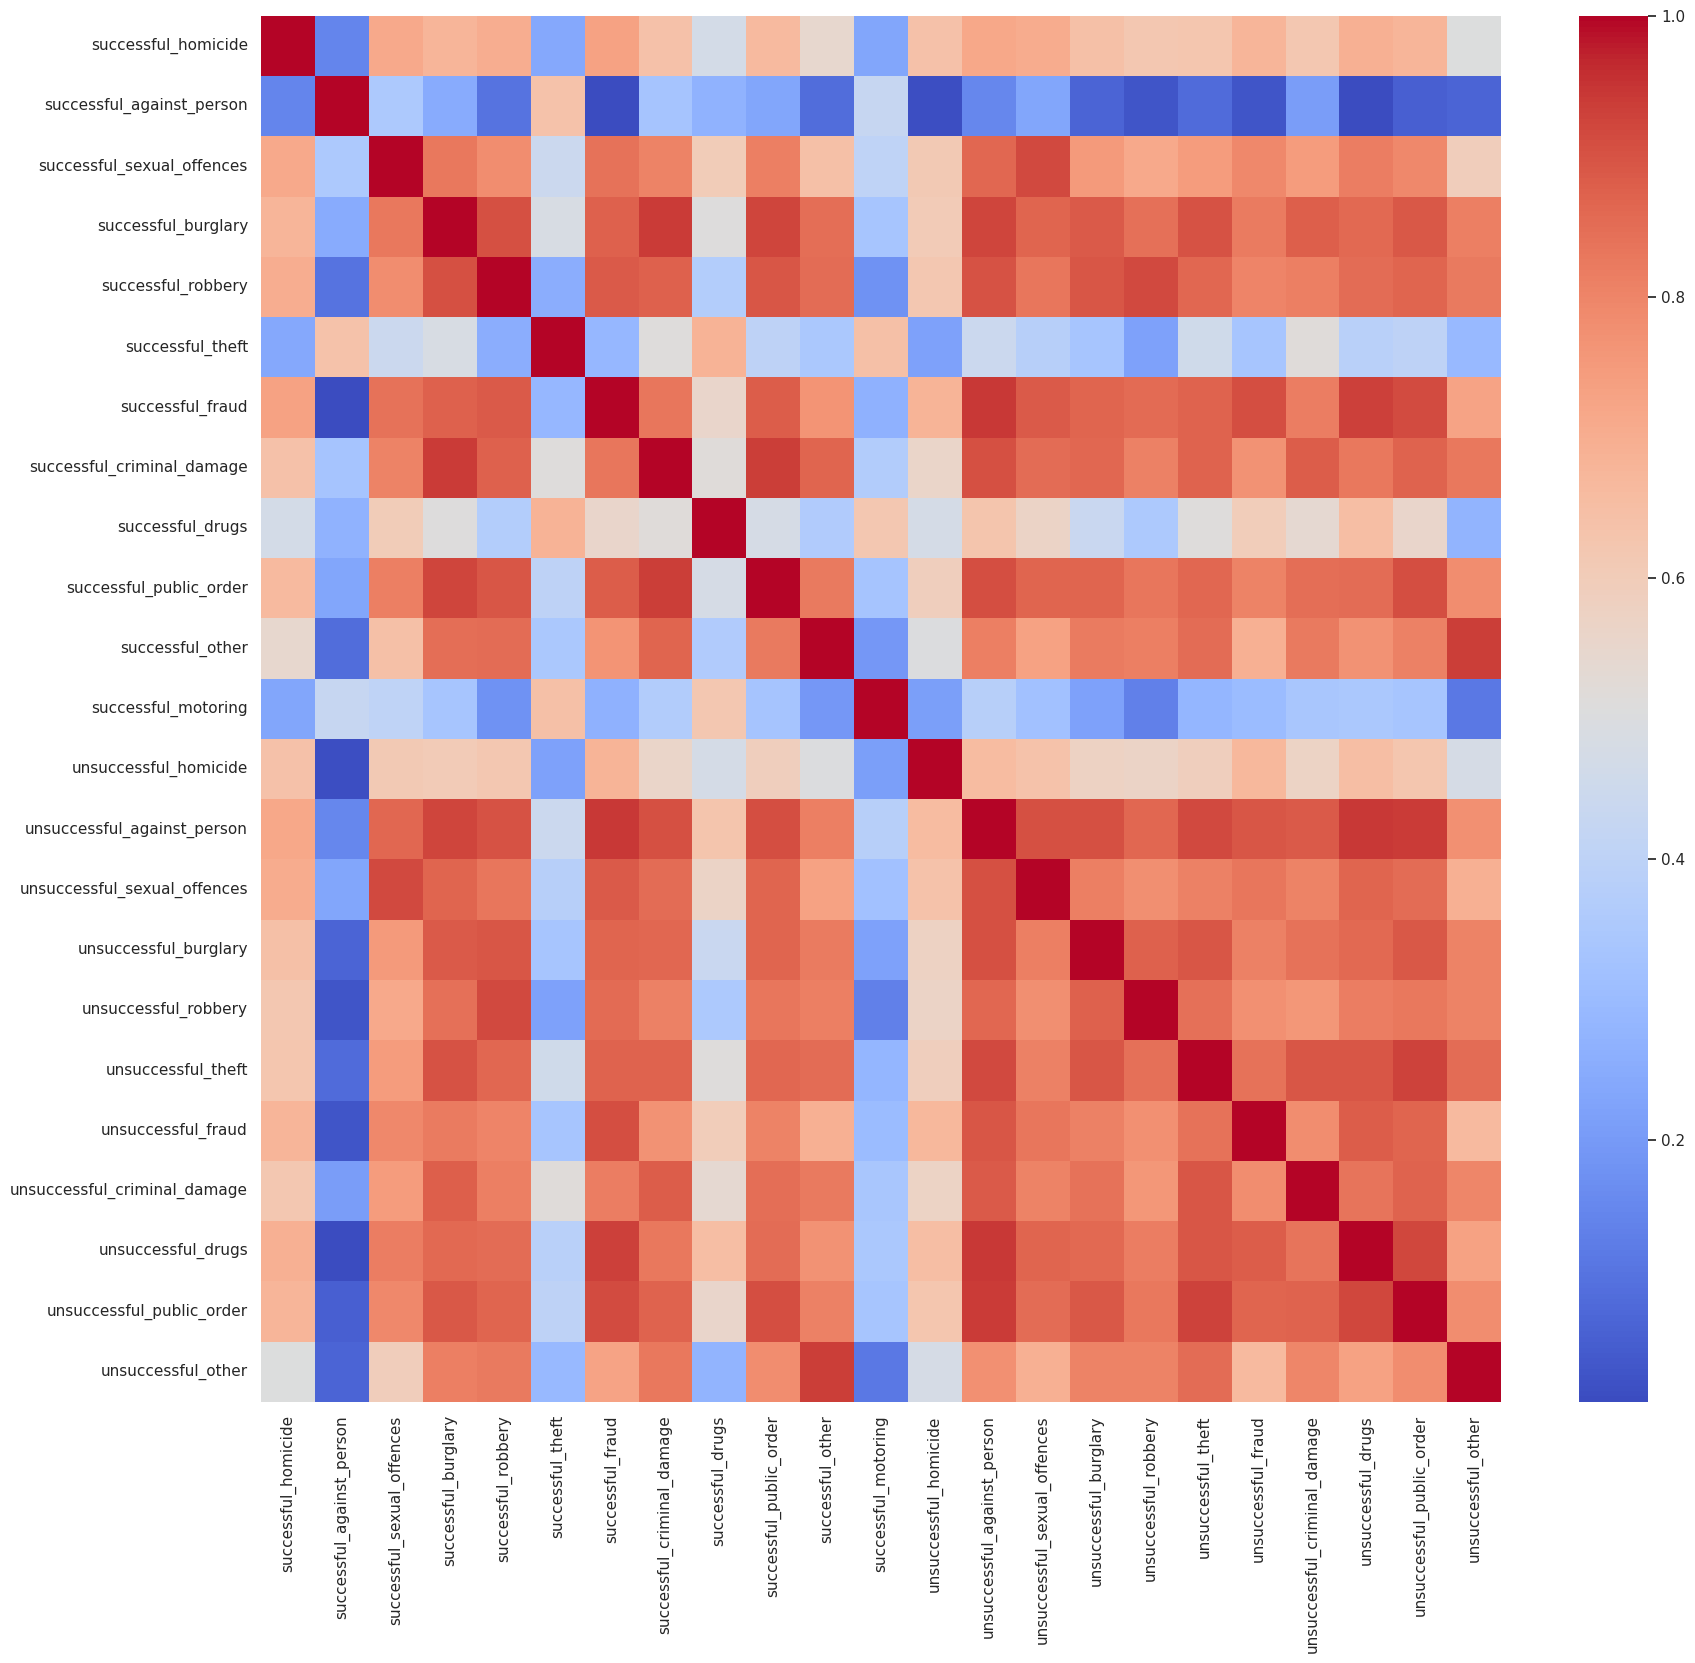

In [ ]:
# Create the heatmap using Seaborn
sns.set (rc = {'figure.figsize':(20, 18)})
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)

plt.show()

In [ ]:
# Subset the data to only include the columns of interest
cols_of_interest = ['county', 'successful_homicide', 'unsuccessful_homicide',
       'successful_against_person', 'unsuccessful_against_person',
       'successful_sexual_offences', 'unsuccessful_sexual_offences',
       'successful_burglary', 'unsuccessful_burglary', 'successful_robbery',
       'unsuccessful_robbery', 'successful_theft', 'unsuccessful_theft',
       'successful_fraud', 'unsuccessful_fraud', 'successful_criminal_damage',
       'unsuccessful_criminal_damage', 'successful_drugs',
       'unsuccessful_drugs', 'successful_public_order',
       'unsuccessful_public_order', 'successful_other', 'unsuccessful_other',
       'successful_motoring', 'unsuccessful_motoring', 'unsuccessful_admin',
       'year', 'month']

df_subset = data[cols_of_interest]

<ipython-input-40-0ffe4e246461>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_counts = df_subset.groupby('county').sum().reset_index()


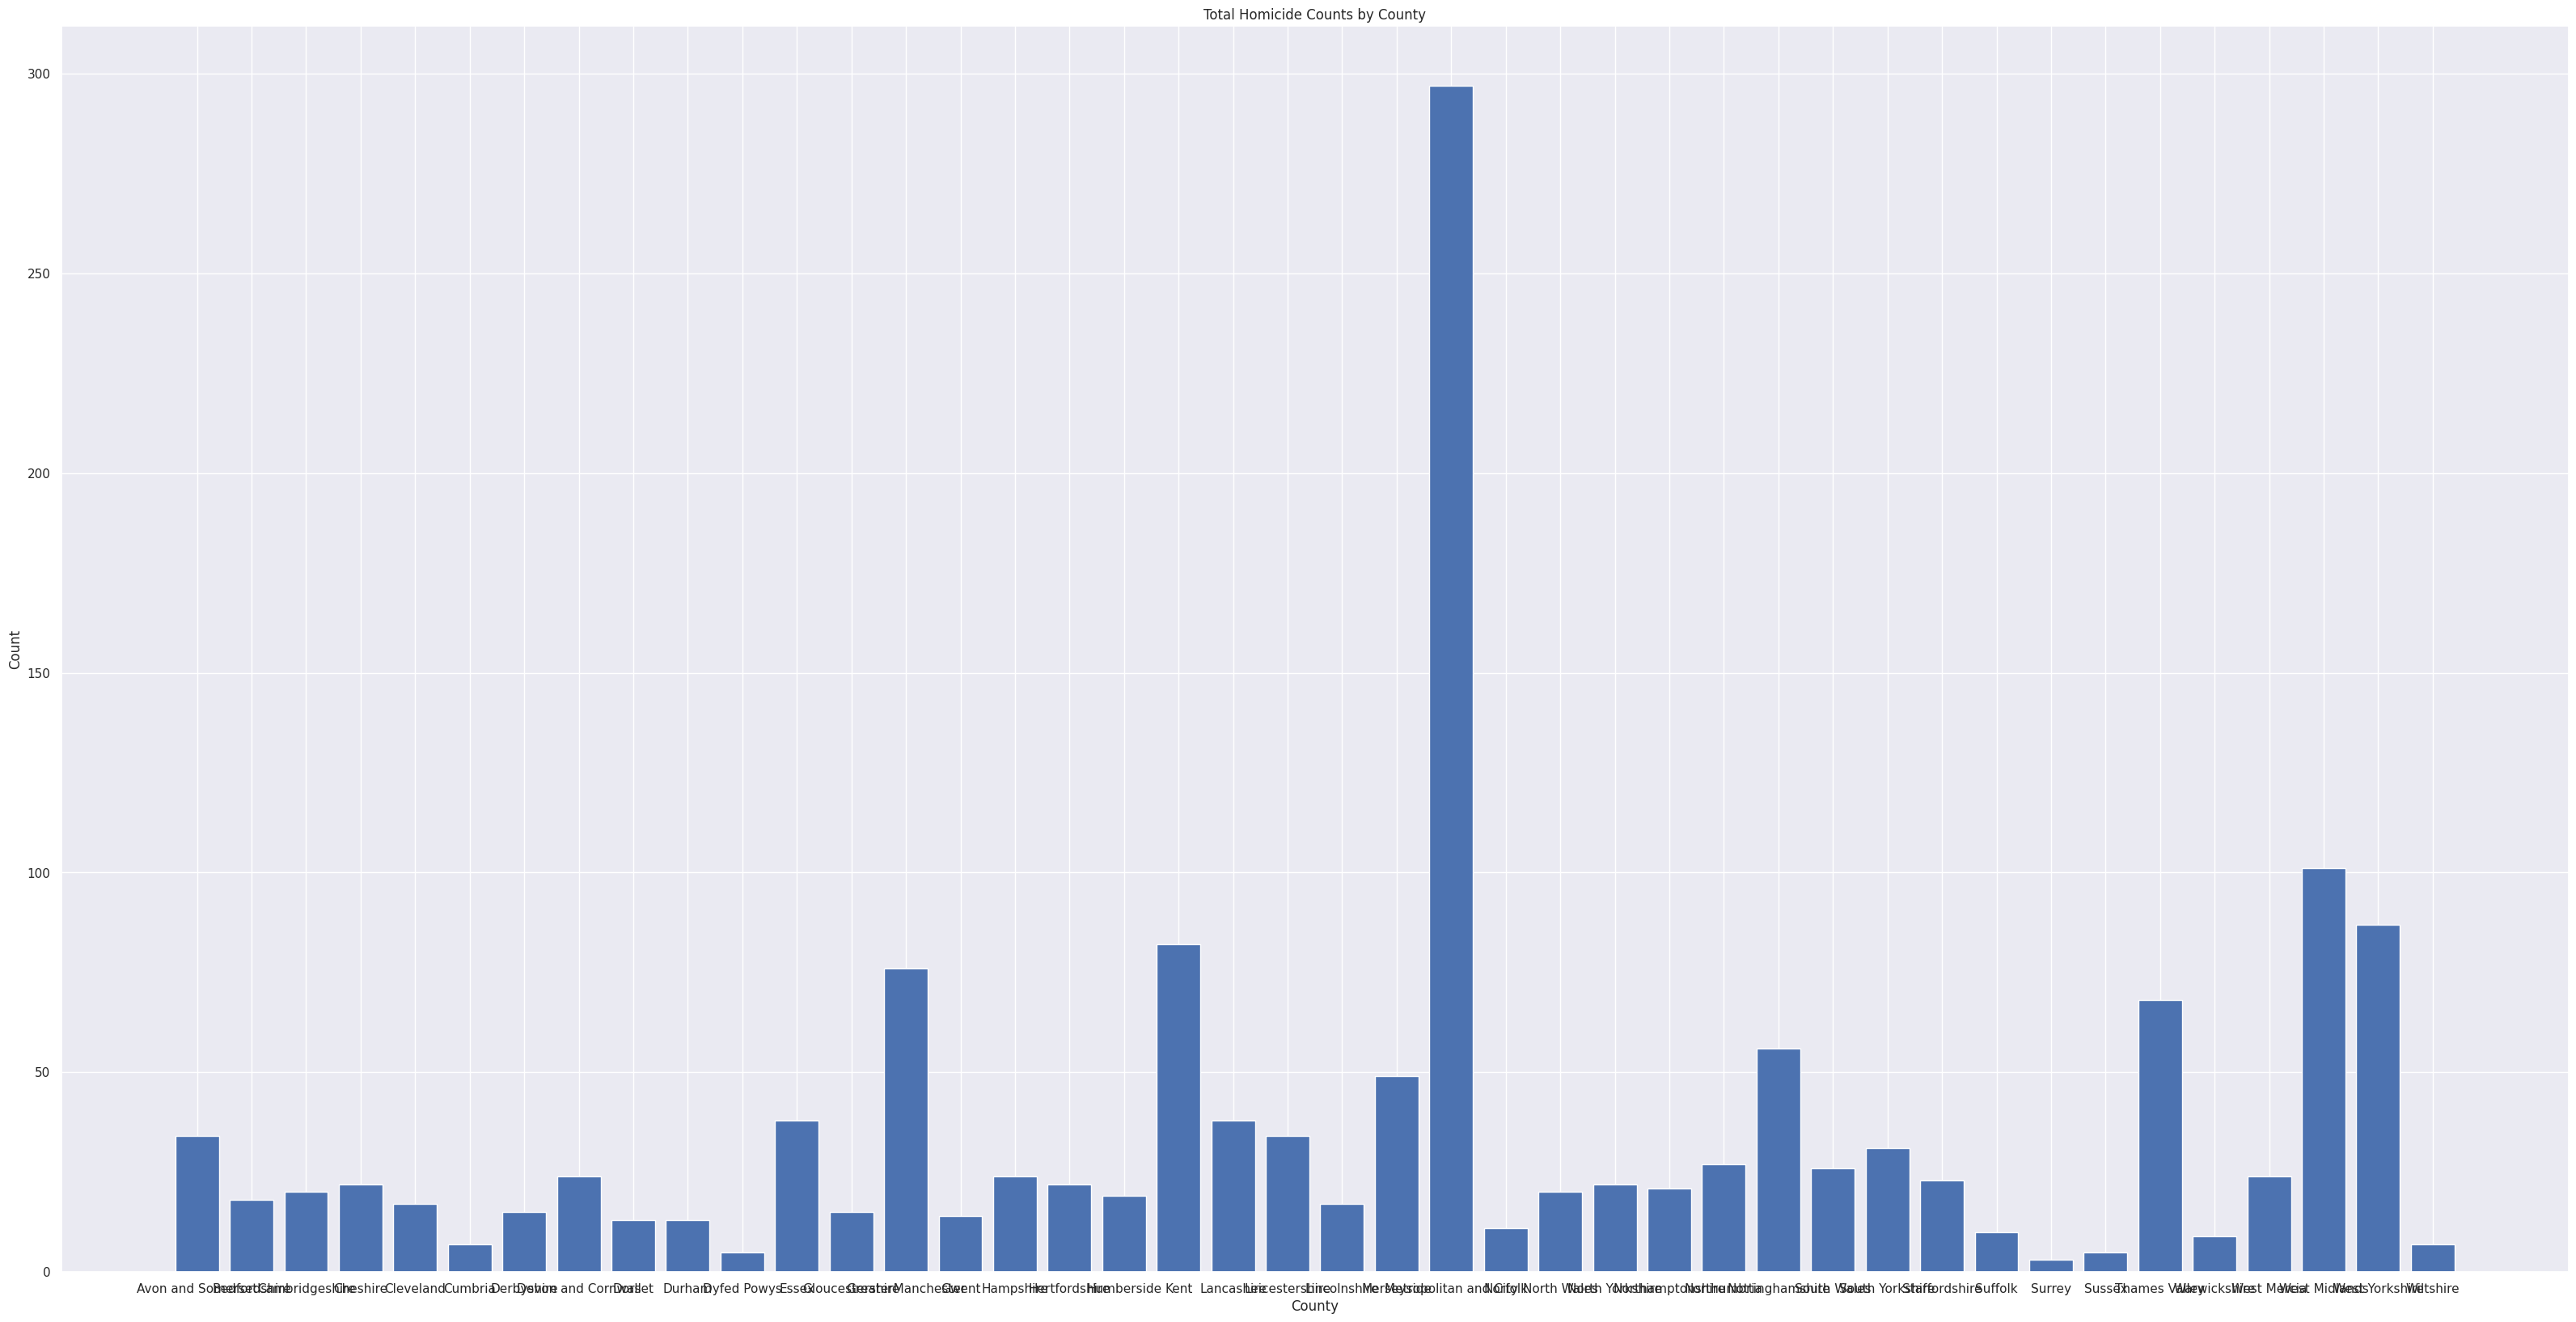

In [ ]:
county_counts = df_subset.groupby('county').sum().reset_index()
plt.figure(figsize=(40, 20))
plt.bar(county_counts['county'], county_counts['successful_homicide'])
plt.title('Total Homicide Counts by County')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()

                county  successful_homicide  unsuccessful_homicide  \
1    Avon and Somerset                    2                      0   
2         Bedfordshire                    0                      0   
3       Cambridgeshire                    3                      0   
4             Cheshire                    0                      0   
5            Cleveland                    0                      0   
..                 ...                  ...                    ...   
339       Warwickshire                    1                      0   
340        West Mercia                    0                      0   
341      West Midlands                    6                      1   
342     West Yorkshire                    5                      0   
343          Wiltshire                    2                      0   

     successful_against_person  unsuccessful_against_person  \
1                          229                           60   
2                           51   

<ipython-input-71-178198803dca>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_counts_2014 = df_subset_2014.groupby(['year', 'month']).sum().reset_index()
<ipython-input-71-178198803dca>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_counts_2018 = df_subset_2018.groupby(['year', 'month']).sum().reset_index()


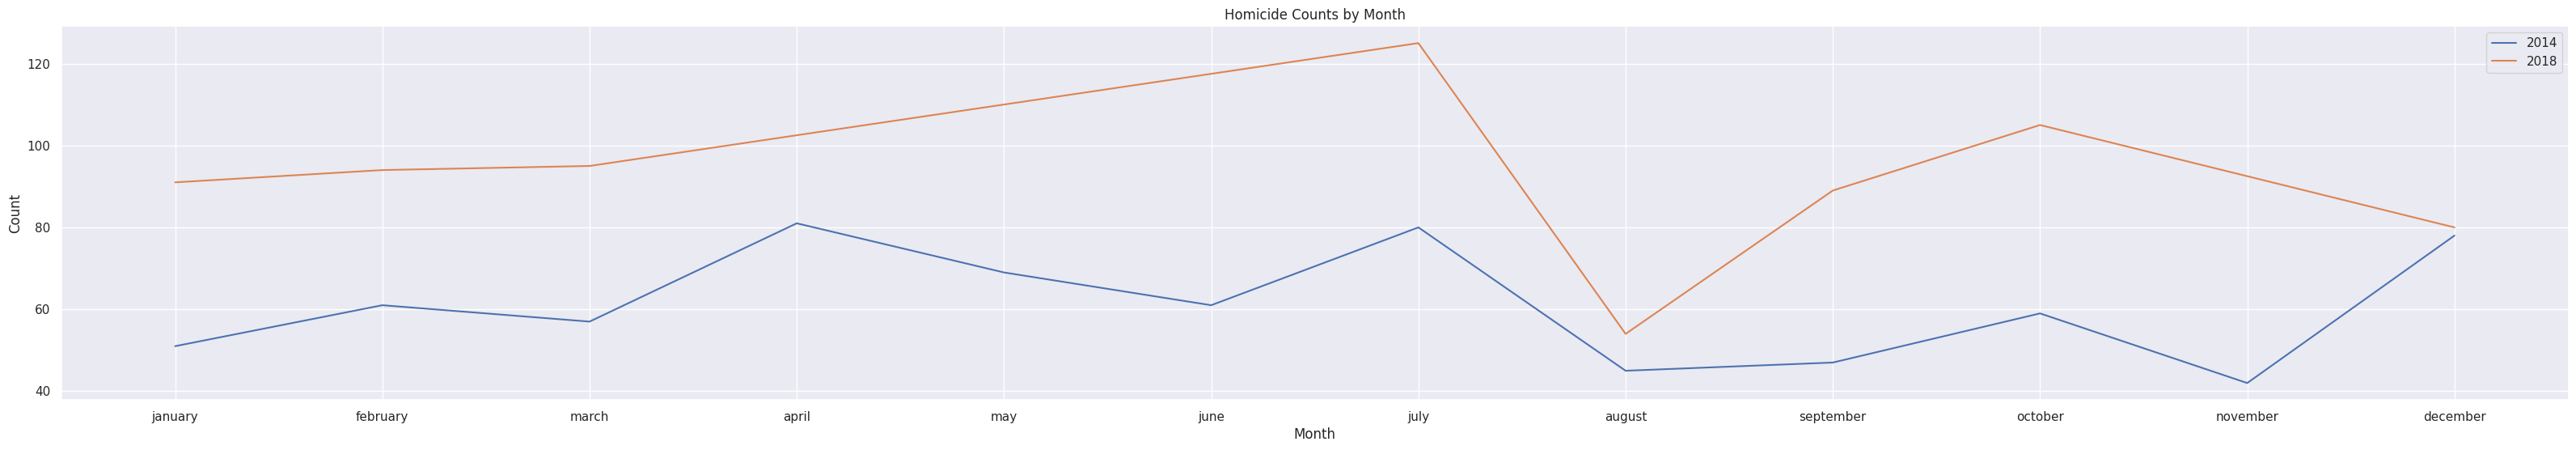

In [ ]:
df_subset_2014 = df_subset[df_subset['year'] == '2014']
df_subset_2018 = df_subset[df_subset['year'] == '2018']
monthly_counts_2014 = df_subset_2014.groupby(['year', 'month']).sum().reset_index()
monthly_counts_2018 = df_subset_2018.groupby(['year', 'month']).sum().reset_index()

# Convert month values to datetime objects
monthly_counts_2014['date'] = pd.to_datetime(monthly_counts_2014['year'].astype(str) + '-' + monthly_counts_2014['month'].astype(str))
monthly_counts_2018['date'] = pd.to_datetime(monthly_counts_2018['year'].astype(str) + '-' + monthly_counts_2018['month'].astype(str))

# Sort the DataFrame based on the month values
monthly_counts_2014 = monthly_counts_2014.sort_values('date')
monthly_counts_2018 = monthly_counts_2018.sort_values('date')


fig, ax = plt.subplots(figsize=(40, 6))
# Plot data for 2014
ax.plot(monthly_counts_2014['month'].astype(str),
        monthly_counts_2014['successful_homicide'], label='2014')

# Plot data for 2018
ax.plot(monthly_counts_2018['month'].astype(str),
        monthly_counts_2018['successful_homicide'], label='2018')

# Set plot title, x-axis label, and y-axis label
ax.set_title('Homicide Counts by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Count')

# Display legend
ax.legend()

# Show the plot
plt.show()

<ipython-input-43-4384fa6c3909>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['county', 'year']).sum()


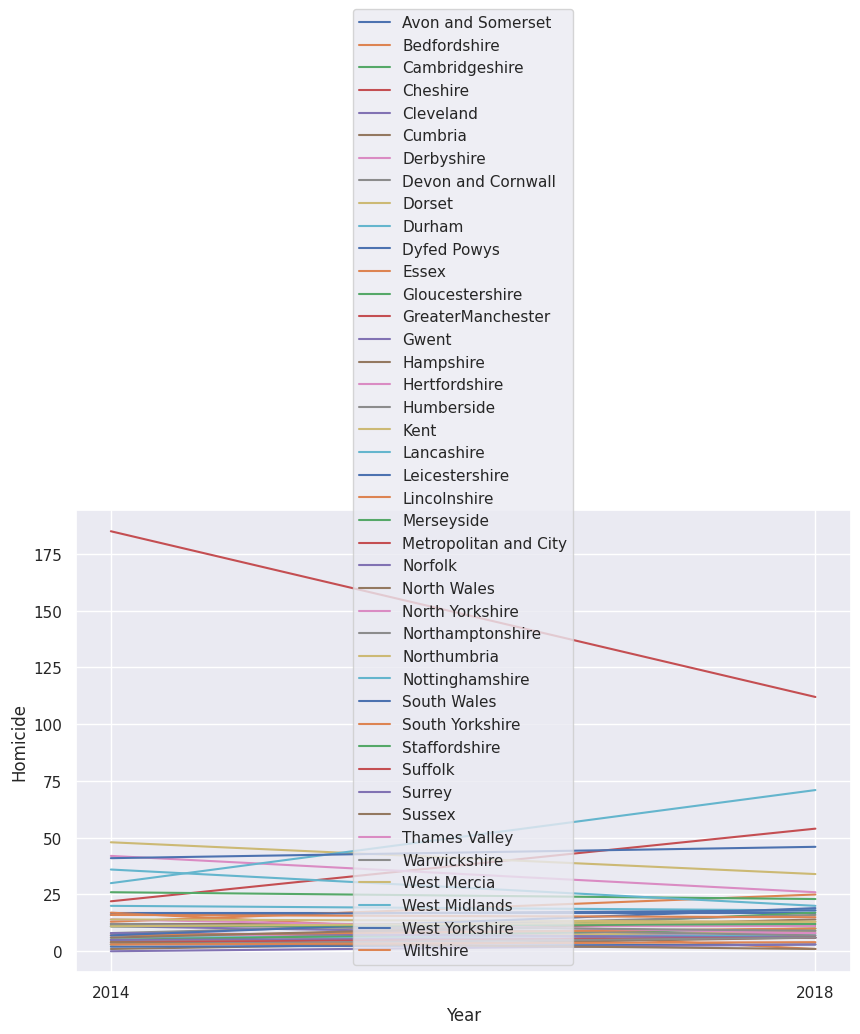

In [ ]:
# Group the data by county and year
grouped_data = data.groupby(['county', 'year']).sum()

# Plot the data using a line chart
fig, ax = plt.subplots(figsize=(10, 6))
for county in grouped_data.index.levels[0]:
    ax.plot(grouped_data.loc[county]['successful_homicide'], label=county)
ax.set_xlabel('Year')
ax.set_ylabel('Homicide')
ax.legend()
plt.show()





1. From the correlation matrix and the correlation heat map we are able to draw some assmptions based on the observations and therefore state a new hypothesis: 

The number of successful homicide cases in a county is positively correlated with the number of unsuccessful homicide cases in the same county.

2. From the bar chart and subplots above it seems the number of successful homicide convictions is more prevalent in some areas than most. For the purposes of this analysis we shall classify counties under two classes urban areas and rural areas. 

We can therefore state a hypothesis as follows: The success rate of homicide cases is higher in urban areas compared to rural areas in the UK. 



***There are distinct clusters of crime patterns across different counties in the UK, based on the success and type of crime reported to the Crown Prosecution Service from 2014 to 2018.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Select relevant columns
df = data[['county', 'successful_homicide', 'unsuccessful_homicide']]


In [ ]:
df

,county,successful_homicide,unsuccessful_homicide
1,Avon and Somerset,2,0
2,Bedfordshire,0,0
3,Cambridgeshire,3,0
4,Cheshire,0,0
5,Cleveland,0,0
...,...,...,...
855,Warwickshire,0,0
856,West Mercia,0,0
857,West Midlands,1,0
858,West Yorkshire,3,0


In [ ]:
# Group data by county and calculate the total number of successful and unsuccessful criminal damage cases
df = df.groupby('county').agg({'successful_homicide': 'sum', 'unsuccessful_homicide': 'sum'}).reset_index()


In [ ]:
df

,county,successful_homicide,unsuccessful_homicide
0,Avon and Somerset,34,9
1,Bedfordshire,18,6
2,Cambridgeshire,20,2
3,Cheshire,22,4
4,Cleveland,17,4
5,Cumbria,7,0
6,Derbyshire,15,1
7,Devon and Cornwall,24,8
8,Dorset,13,1
9,Durham,13,1


In [ ]:
# Create a new column for the total number of against person cases
df['total_homicide'] = df['successful_homicide'] + df['unsuccessful_homicide']


In [ ]:
# Calculate the percentage of successful against person cases for each county
df['success_rate'] = df['successful_homicide'] / df['total_homicide']


<Axes: xlabel='successful_homicide', ylabel='unsuccessful_homicide'>

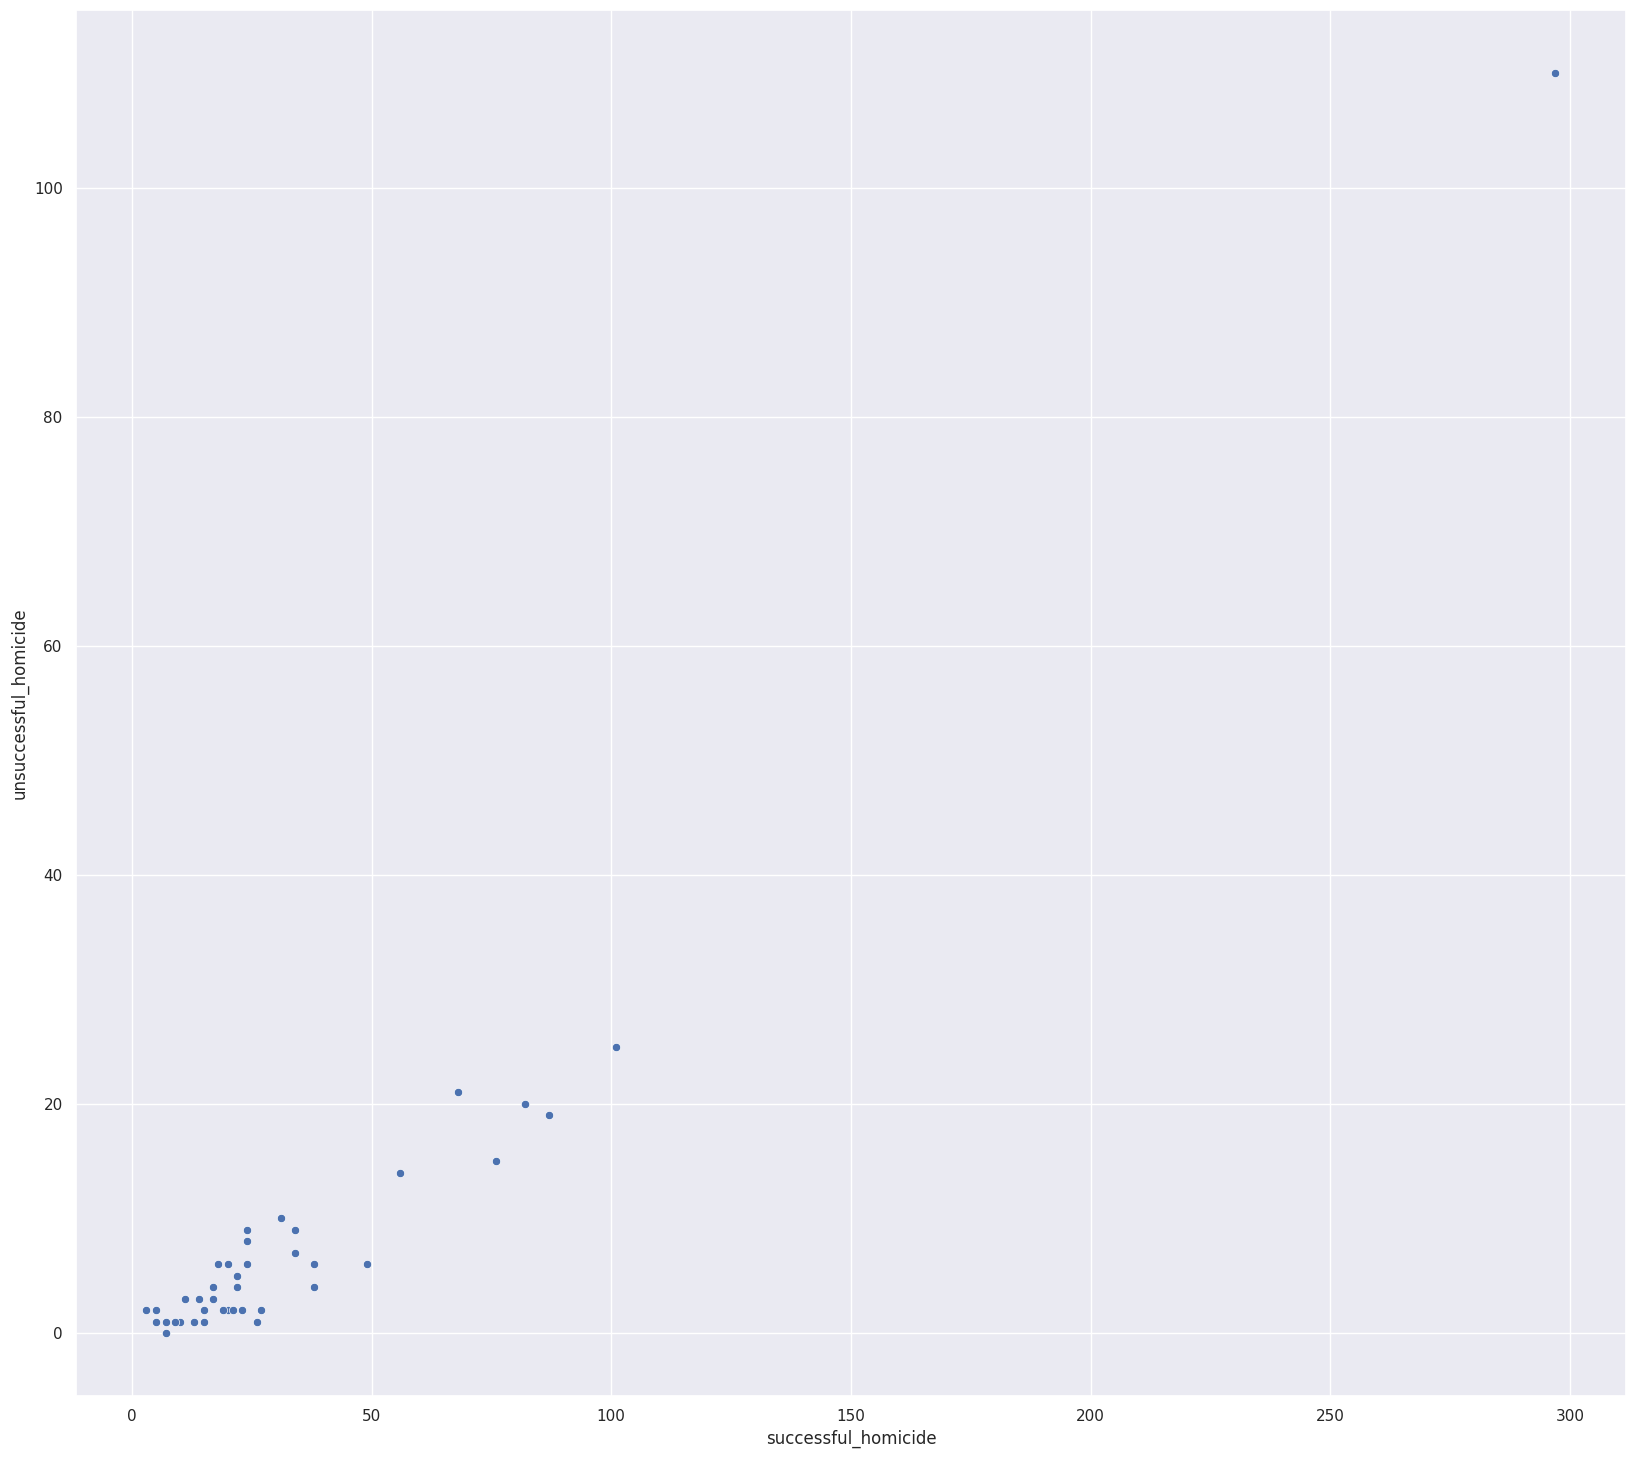

In [ ]:
# Plot a scatter plot to visualize the relationship between successful and unsuccessful criminal damage cases
sns.scatterplot(x='successful_homicide', y='unsuccessful_homicide', data=df)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['successful_homicide'], df['unsuccessful_homicide'], test_size=0.2, random_state=42)


In [ ]:
# Fit a linear regression model to the training data
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)

In [ ]:
# Predict the number of unsuccessful criminal damage cases using the trained model and the test data
y_pred = reg.predict(X_test.values.reshape(-1, 1))

In [ ]:
# Calculate the mean squared error and the coefficient of determination (R-squared) for the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean squared error: {:.2f}".format(mse))
print("Coefficient of determination (R-squared): {:.2f}".format(r2))

Mean squared error: 21.96
Coefficient of determination (R-squared): 0.61


We first select the columns relevant to the hypothesis (county, successful homicide convictions, and unsuccessful homicide convictions). We then groups the data by county and calculate the total number of successful and unsuccessful homicide convictions for each county.(Type of feature engineering). We thenalso creates a new column for the total number of homicide convictions and calculates the percentage of successful homicide convictions for each county.

Then we plot a scatter plot to visualize the relationship between successful and unsuccessful homicide convictions. We then split the data into training and testing sets and fit a linear regression model to the training data. We then use the trained model to predict the number of unsuccessful homicide convictions using the test data and calculate the mean squared error and the coefficient of determination (R-squared) for the predictions.



 In this case, the MSE is reported as 21.96. A lower MSE indicates that the model's predictions are closer to the actual values, suggesting a better fit.

The coefficient of determination, commonly known as R-squared, is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. R-squared values range from 0 to 1, with higher values indicating a better fit of the model to the data. In this case, the R-squared value is reported as 0.61, suggesting that approximately 61% of the variance in the dependent variable can be explained by the independent variables in the model.

## Feature Engineering 1

Since our target feature is successful homicide convictions calculating the ratio of successful homicide convictions to total convictions (successful + unsuccessful) may make sense. This feature has been introduced because it can provide insights into the overall success rate for different types of crimes. Using filtering we can use Homicide convictions only.

In [ ]:
import re

In [ ]:
# Regular expression specifying a set of strings matching successful and unsuccessful columns
data['total_convictions'] = data.filter(regex='^(successful|unsuccessful)').sum(axis=1)
data['success_ratio'] = data['successful_homicide'] / data['total_convictions']

In [ ]:
data.head()

,year,month,county,successful_homicide,unsuccessful_homicide,successful_against_person,unsuccessful_against_person,successful_sexual_offences,unsuccessful_sexual_offences,successful_burglary,...,unsuccessful_public_order,successful_other,unsuccessful_other,successful_motoring,unsuccessful_motoring,unsuccessful_admin,total_convictions,success_ratio,date,quarter
1,2018,february,Avon and Somerset,2,0,229,60,33,11,21,...,12,8,0,183,26,34,996,0.002008,2018-02-01,1
2,2018,february,Bedfordshire,0,0,51,27,5,1,8,...,2,5,0,99,30,18,377,0.000000,2018-02-01,1
3,2018,february,Cambridgeshire,3,0,109,32,8,1,8,...,5,3,0,92,9,13,431,0.006961,2018-02-01,1
4,2018,february,Cheshire,0,0,230,52,18,8,11,...,3,15,1,197,36,22,1017,0.000000,2018-02-01,1
5,2018,february,Cleveland,0,0,103,21,8,3,41,...,6,5,2,65,10,11,658,0.000000,2018-02-01,1


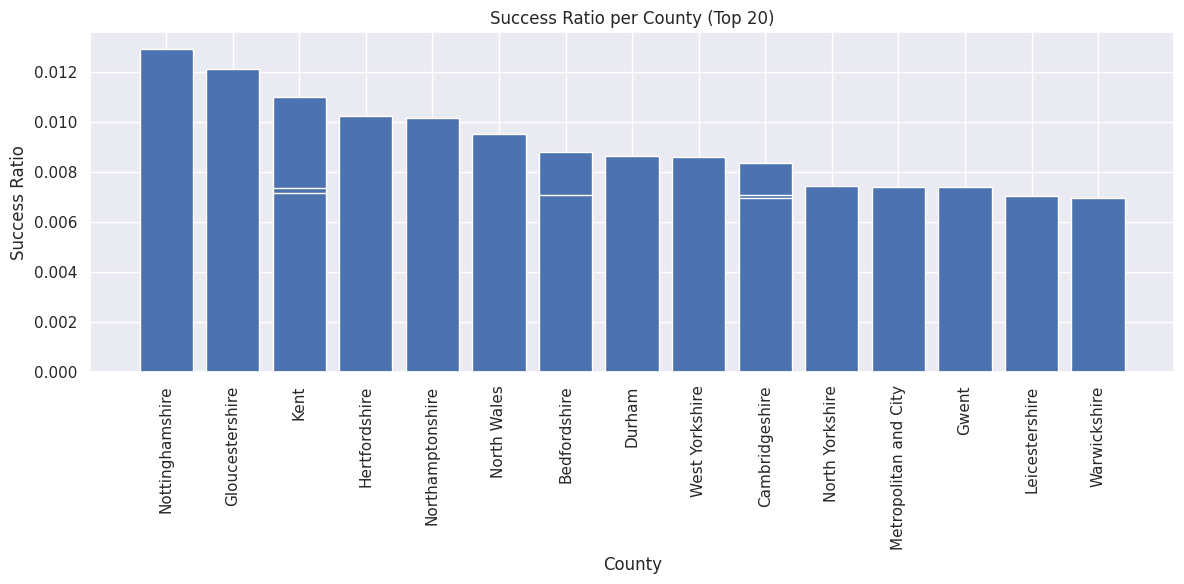

In [ ]:
# Sort the DataFrame by the 'success_ratio' column in descending order and select the top 20 counties
top_20_counties = data.sort_values('success_ratio', ascending=False).head(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_20_counties['county'], top_20_counties['success_ratio'])
plt.xlabel('County')
plt.ylabel('Success Ratio')
plt.title('Success Ratio per County (Top 20)')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility

plt.tight_layout()
plt.show()

Extracting additional time-related feature like the quarter feature from an engineered  "date,"columns. This can help analyze crime trends over time.

## Feature Engineering 2 

In [ ]:
# Extracting a new feature successful homicide convictions rate.
data['homicide_total'] =data['successful_homicide'] + data['unsuccessful_homicide'] 
data['success_homicide_rate'] = data['successful_homicide']/data['homicide_total']

<Axes: xlabel='homicide_total', ylabel='success_homicide_rate'>

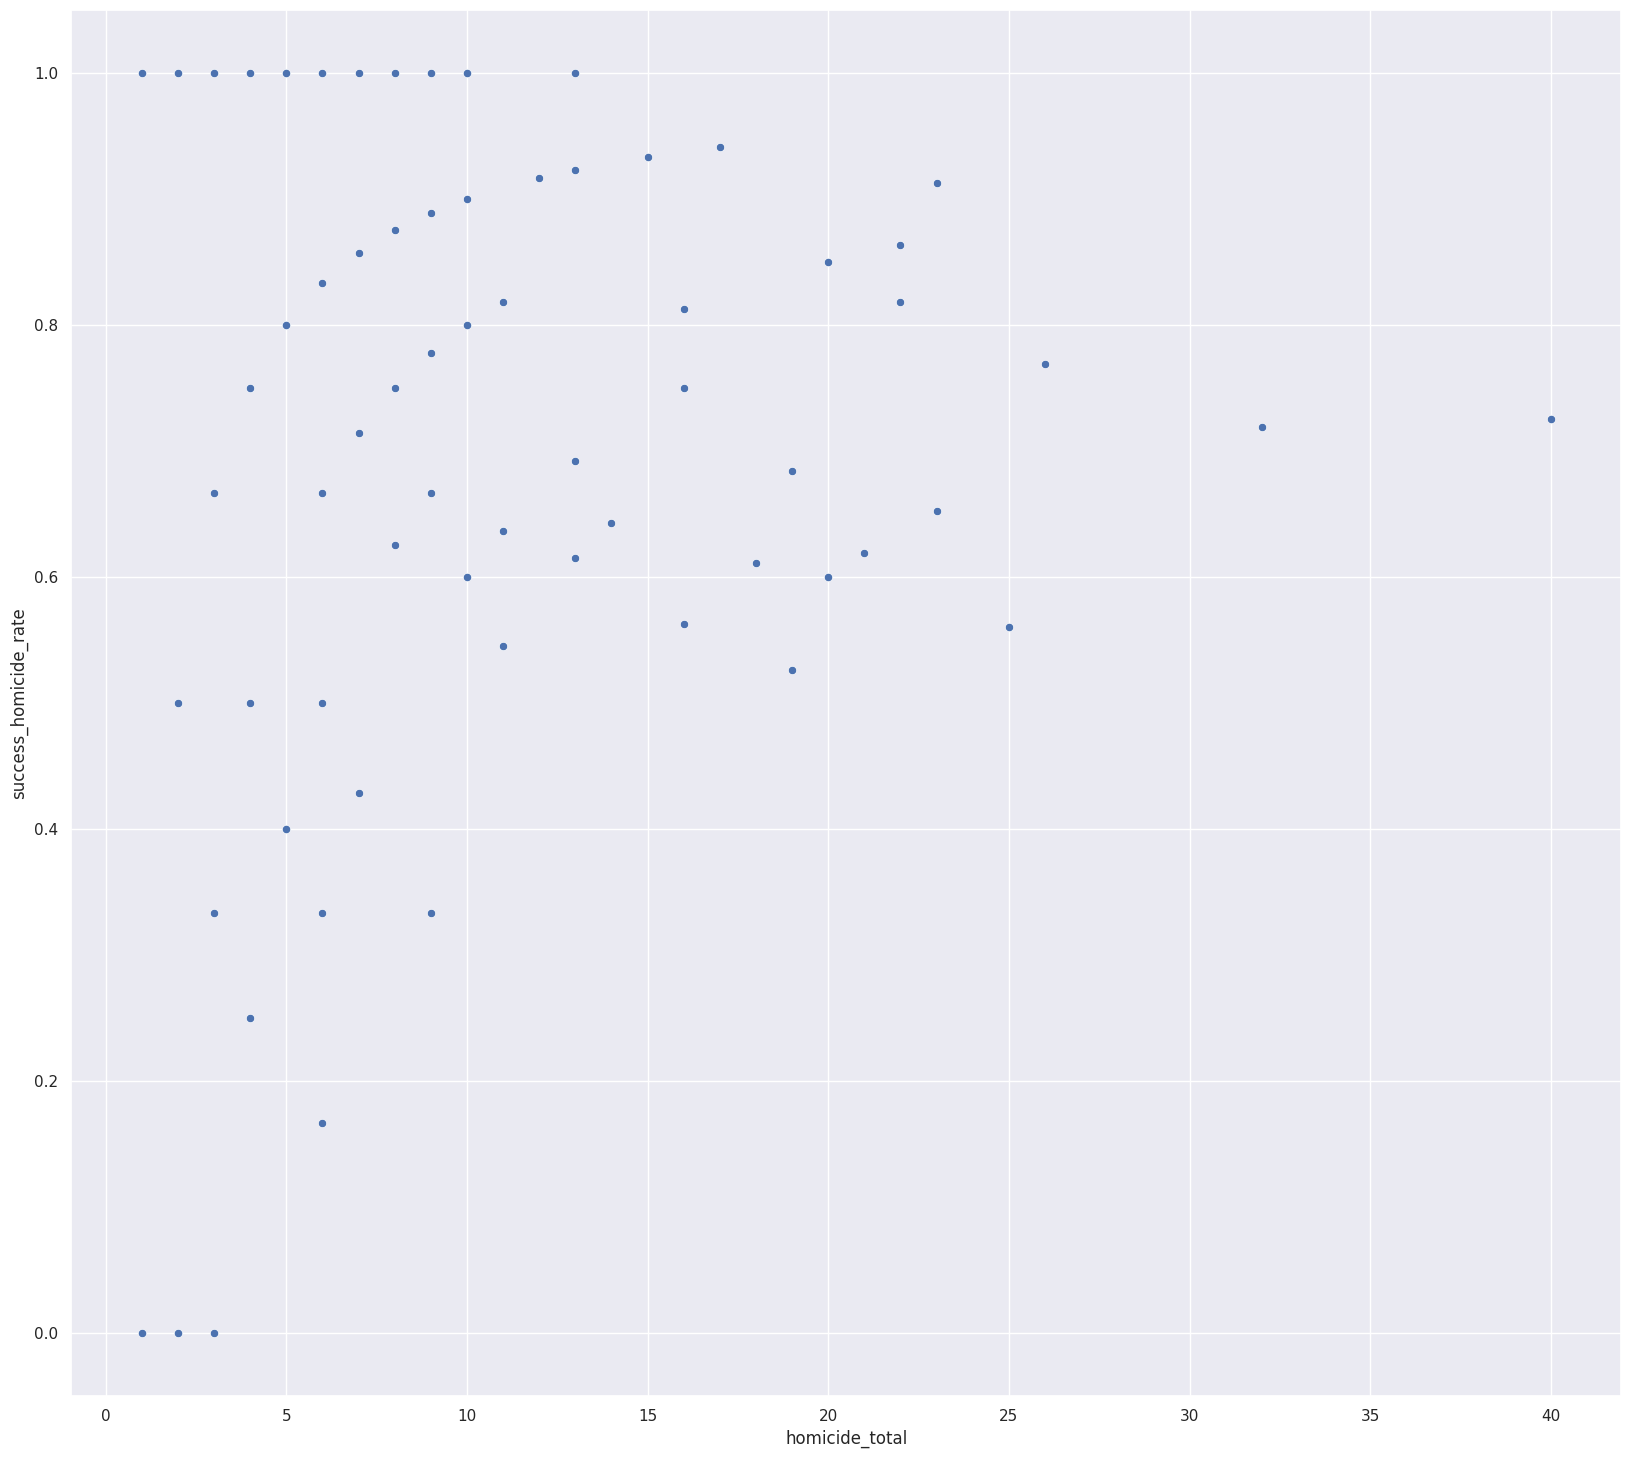

In [ ]:
sns.scatterplot(x='homicide_total', y='success_homicide_rate', data=data)

There seams to be an exponential relationship between the total homicide cases and the successful conviction rate therefore this feature was quite valuable in realising this observation. However we might want to consider removing the capping using algorithms as it may affect the machine learning models.

## Additional Time Related Feature

Extracting additional time-related feature, that is the quarter feature from an engineered  "date"column. This can help analyze crime trends over time. The capping at one may not neccessarily be futal as it is a rate therefore we expect a capping. 



In [ ]:
# Create a date column by combining month and year
data['date'] = pd.to_datetime(data['month'] + ' ' + data['year'].astype(str))
data['quarter'] = data['date'].dt.quarter

<ipython-input-62-44174fcc673c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_counties = data.groupby('county').mean().nlargest(20, 'success_ratio').index
<ipython-input-62-44174fcc673c>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_top_counties.groupby('quarter').mean()


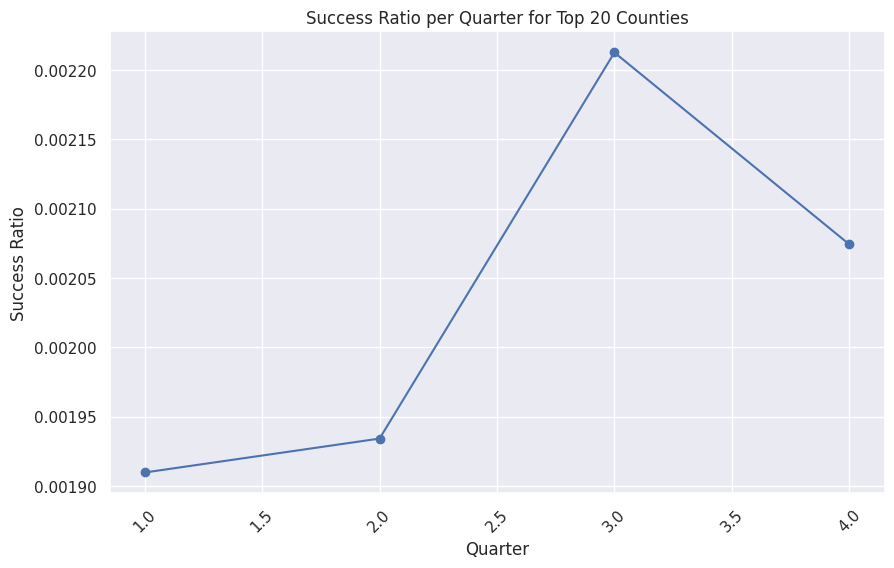

In [ ]:
# Select the top 20 counties based on success_ratio
top_counties = data.groupby('county').mean().nlargest(20, 'success_ratio').index

# Filter the dataset for the top counties
df_top_counties = data[data['county'].isin(top_counties)]

# Group the data by quarter and calculate the average success_ratio
df_grouped = df_top_counties.groupby('quarter').mean()

# Plotting the chart
quarters = df_grouped.index
success_ratio = df_grouped['success_ratio']

plt.figure(figsize=(10, 6))
plt.plot(quarters, success_ratio, marker='o')
plt.xlabel('Quarter')
plt.ylabel('Success Ratio')
plt.title('Success Ratio per Quarter for Top 20 Counties')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Defining Transformer Classes for the Data before Machine Learning

Transformer classes enable transformation and data cleaning while preprocessing the data for machine learning.In our case we will use a custom transformer to remove outliers, since we have noted earlier on that there might be outliers within components of the train set. We also define a custom transformer class for selecting specific columns from the dataset since the success_ratio feature extracted earlier depends on columns selected.

In [ ]:
# Importing the libraries
from sklearn.base import BaseEstimator, TransformerMixin


In [ ]:
# Defining a custom transformer class for selecting specific columns from the dataset
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, data, y=None):
        return self
    
    def transform(self, data):
        return data[self.columns]

In [ ]:
data.columns

Index(['year', 'month', 'county', 'successful_homicide',
       'unsuccessful_homicide', 'successful_against_person',
       'unsuccessful_against_person', 'successful_sexual_offences',
       'unsuccessful_sexual_offences', 'successful_burglary',
       'unsuccessful_burglary', 'successful_robbery', 'unsuccessful_robbery',
       'successful_theft', 'unsuccessful_theft', 'successful_fraud',
       'unsuccessful_fraud', 'successful_criminal_damage',
       'unsuccessful_criminal_damage', 'successful_drugs',
       'unsuccessful_drugs', 'successful_public_order',
       'unsuccessful_public_order', 'successful_other', 'unsuccessful_other',
       'successful_motoring', 'unsuccessful_motoring', 'unsuccessful_admin',
       'total_convictions', 'success_ratio', 'date', 'quarter',
       'homicide_total', 'success_homicide_rate'],
      dtype='object')

In [ ]:
# Creating a case for the transformer to select columns 
columns_to_select = ['year', 'month', 'county', 'successful_homicide',
       'unsuccessful_homicide', 'successful_against_person','successful_sexual_offences',
       'successful_burglary', 'successful_robbery', 'successful_theft','successful_fraud',
       'successful_criminal_damage','successful_drugs','successful_public_order', 'successful_other', 
       'successful_motoring','total_convictions', 'success_ratio', 'homicide_total','success_homicide_rate']
column_selector = ColumnSelector(columns=columns_to_select)

In [ ]:
# Applying the transformer to the data
selected_data = column_selector.transform(data)

In [ ]:
# We define a class named 'Outlier' that inherits from the BaseEstimator and TransformerMixin classes

class Outlier(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3):
        self.threshold = threshold

    def fit(self, data, y=None):
        return self

    def transform(self, data):
        # Copying the input data
        data_out = data.copy()

        # Iterating over each column and remove outliers
        for column in data.columns:
            # Calculate the z-score for each value in the column
            z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())

            # Replace outliers with NaN values
            data_out[column][z_scores > self.threshold] = np.nan

        # Drop rows with NaN values
        data_out.dropna(inplace=True)

        return data_out